In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file='bank.csv'
bank_df = pd.read_csv('bank.csv', header=None,skiprows=1)
bank_df = bank_df[0].str.split(';', expand=True)
bank_df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [3]:
bank_df['balance'] = bank_df['balance'].astype(float)
bank_df['balance'] = bank_df['balance'].replace(',', '.', regex=True)
bank_df['age'] = bank_df['age'].astype(int)
bank_df['age'] = bank_df['age'].replace(' ', '0', regex=True)
bank_df['day'] = bank_df['day'].astype(int)
bank_df['day'] = bank_df['day'].replace(' ', '0', regex=True)
bank_df['campaign'] = bank_df['campaign'].astype(int)
bank_df['campaign'] = bank_df['campaign'].replace(' ', '0', regex=True)
bank_df['pdays'] = bank_df['pdays'].astype(int)
bank_df['pdays'] = bank_df['pdays'].replace(' ', '0', regex=True)
bank_df['previous'] = bank_df['previous'].astype(int)
bank_df['previous'] = bank_df['previous'].replace(' ', '0', regex=True)
bank_df['duration'] = bank_df['duration'].astype(int)
bank_df['duration'] = bank_df['duration'].replace(' ', '0', regex=True)

In [5]:
num=bank_df.select_dtypes(include=[np.number]).columns
cat=bank_df.select_dtypes(exclude=[np.number]).columns

In [6]:
num

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [7]:
bank_df['day']

0       19
1       11
2       16
3        3
4        5
        ..
4516    30
4517     9
4518    19
4519     6
4520     3
Name: day, Length: 4521, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x177a34056d0>,
 'caps': [<matplotlib.lines.Line2D at 0x177a3405950>,
 'boxes': [<matplotlib.lines.Line2D at 0x177a3405590>],
 'medians': [<matplotlib.lines.Line2D at 0x177a3405bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x177a3405d10>],
 'means': []}

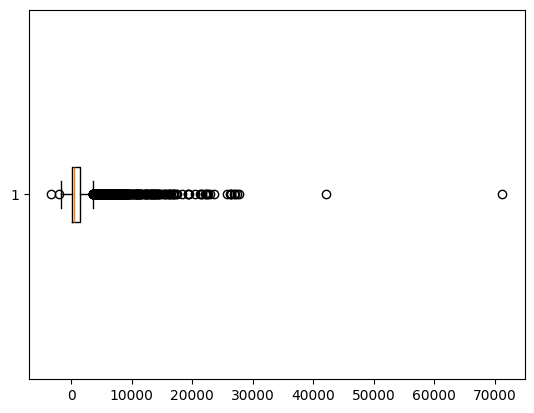

In [10]:
plt.boxplot(bank_df['balance'],vert=False)

In [16]:
x=bank_df['day']

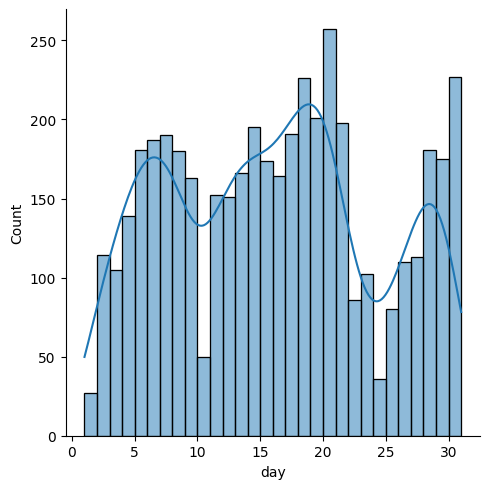

In [14]:
sns.displot(bank_df['day'], kde=True, bins=30)

In [28]:
x=bank_df['balance']
mean=np.mean(x)
std=np.std(x)
nr=(x-mean)
bank_df['balance_z'] = nr/std

In [29]:
bank_df[['balance', 'balance_z']].head(10)

,balance,balance_z
0,1787.0,0.121072
1,4789.0,1.118644
2,1350.0,-0.024144
3,1476.0,0.017726
4,0.0,-0.472753
5,747.0,-0.224523
6,307.0,-0.370736
7,147.0,-0.423904
8,221.0,-0.399314
9,-88.0,-0.501996


**Standard Scalar**

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bank_df['balance_ss'] = scaler.fit_transform(bank_df[['balance']])

In [31]:
bank_df[['balance', 'balance_z','balance_ss']].head(10)

,balance,balance_z,balance_ss
0,1787.0,0.121072,0.121072
1,4789.0,1.118644,1.118644
2,1350.0,-0.024144,-0.024144
3,1476.0,0.017726,0.017726
4,0.0,-0.472753,-0.472753
5,747.0,-0.224523,-0.224523
6,307.0,-0.370736,-0.370736
7,147.0,-0.423904,-0.423904
8,221.0,-0.399314,-0.399314
9,-88.0,-0.501996,-0.501996


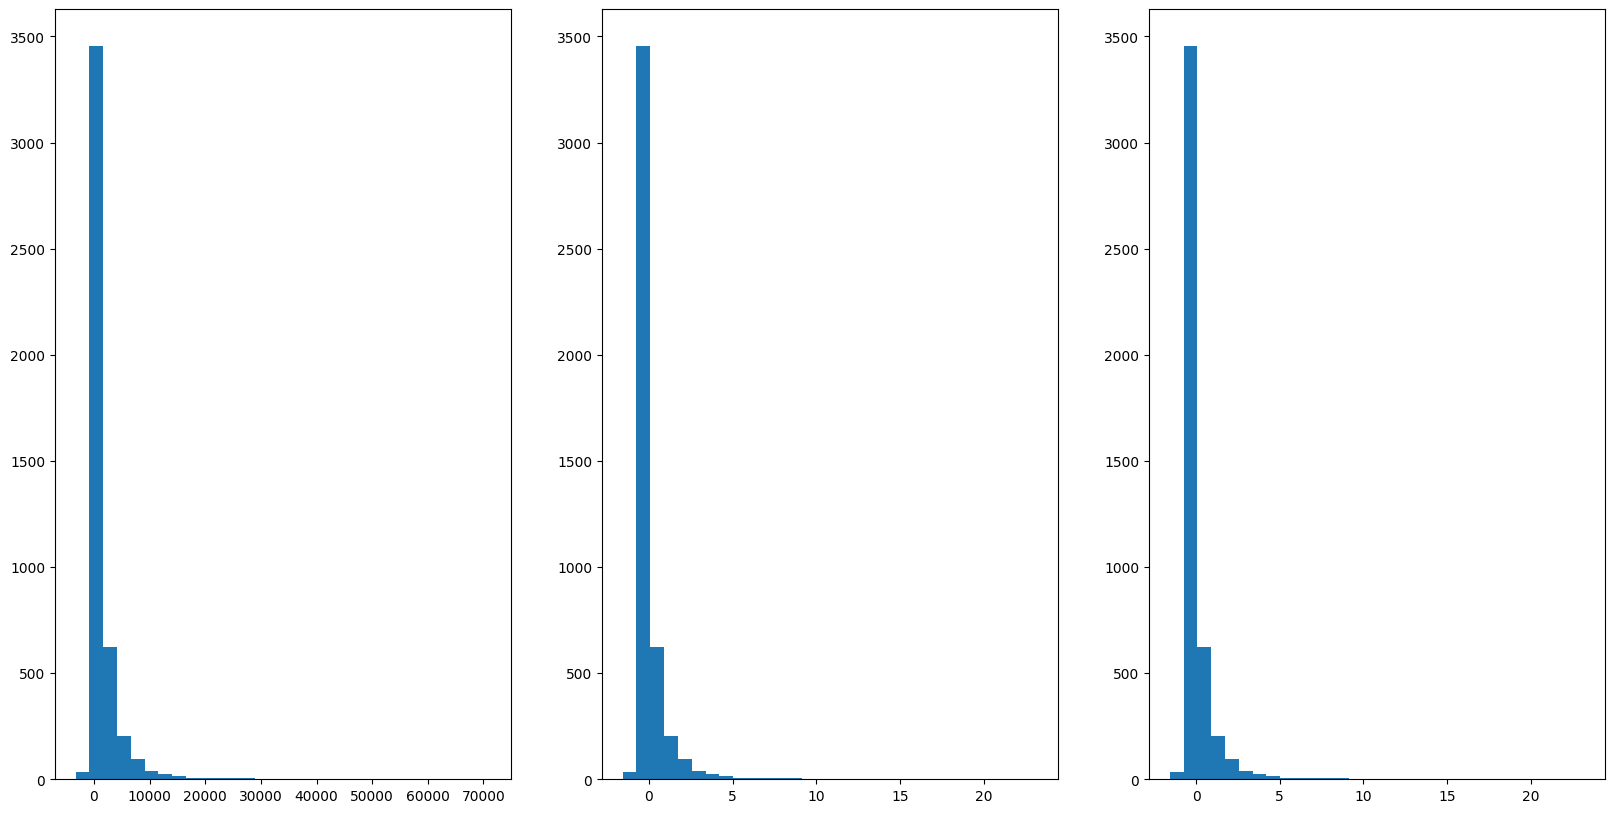

In [32]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1).hist(bank_df['balance'], bins=30)
plt.subplot(1, 3, 2).hist(bank_df['balance_z'], bins=30)
plt.subplot(1, 3, 3).hist(bank_df['balance_ss'], bins=30)
plt.show()

**MinMaxScalar**

In [33]:
x=bank_df['balance']
mean=np.mean(x)
min = np.min(x)
max=  np.max(x)
bank_df['balance_m'] = (x-min)/(max-min)

In [35]:
bank_df[['balance','balance_m']].head(10)

,balance,balance_m
0,1787.0,0.068455
1,4789.0,0.108750
2,1350.0,0.062590
3,1476.0,0.064281
4,0.0,0.044469
5,747.0,0.054496
6,307.0,0.048590
7,147.0,0.046442
8,221.0,0.047436
9,-88.0,0.043288


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bank_df['balance_mms'] = scaler.fit_transform(bank_df[['balance']])
bank_df[['balance','balance_m','balance_mms']].head(10)

,balance,balance_m,balance_mms
0,1787.0,0.068455,0.068455
1,4789.0,0.108750,0.108750
2,1350.0,0.062590,0.062590
3,1476.0,0.064281,0.064281
4,0.0,0.044469,0.044469
5,747.0,0.054496,0.054496
6,307.0,0.048590,0.048590
7,147.0,0.046442,0.046442
8,221.0,0.047436,0.047436
9,-88.0,0.043288,0.043288


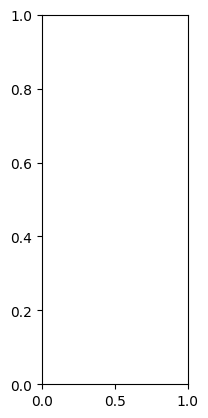

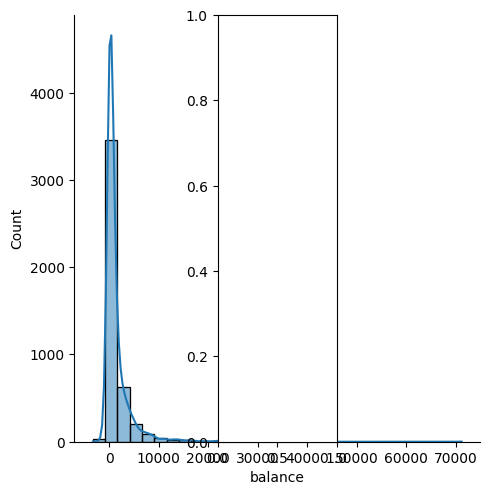

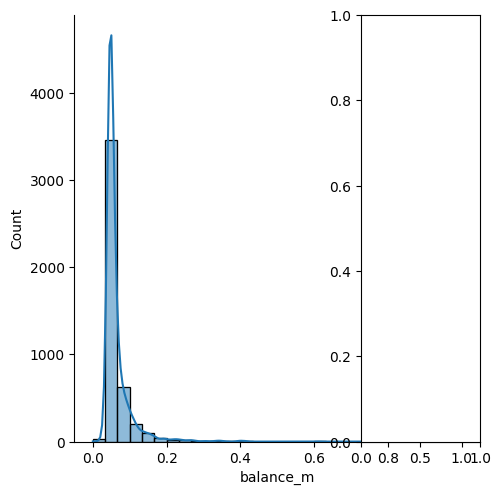

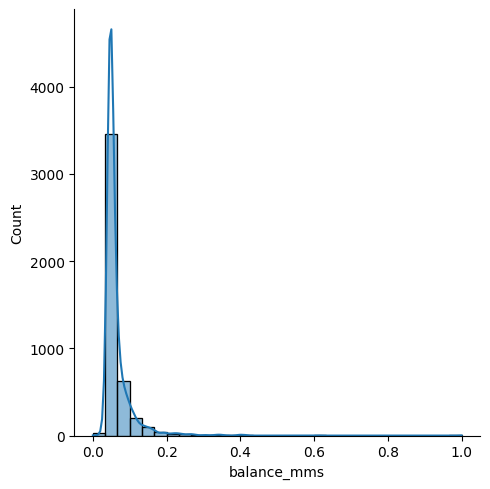

In [40]:
plt.Figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.displot(bank_df['balance'], kde=True, bins=30)
plt.subplot(1, 3, 2)
sns.displot(bank_df['balance_m'], kde=True, bins=30)
plt.subplot(1, 3, 3)
sns.displot(bank_df['balance_mms'], kde=True, bins=30)
plt.show()

In [41]:
np.nansum(bank_df['balance'])

np.float64(6431836.0)

In [42]:
np.sum(bank_df['balance'])

np.float64(6431836.0)

In [47]:
bank_df['balance'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Name: balance, Length: 4521, dtype: bool

In [49]:
import pandas as pd

# Create df1
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
})

# Create df2
df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'score': [85, 90, 75]
})

# Set index for df3
df3 = pd.DataFrame({
    'score': [88, 92, 80]
}, index=['Alice', 'Bob', 'David'])

In [50]:
print(df1)
print(df2)
print(df3)

   id     name
0   1    Alice
1   2      Bob
2   3  Charlie
   id  score
0   1     85
1   2     90
2   4     75
       score
Alice     88
Bob       92
David     80
